In [24]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import matplotlib
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=4)

print(X.shape)
print(y.shape)

sum0=0
sum1=0
for i in range(y.shape[0]):
	if(y[i]==0):
		sum0=sum0+1
	else:
		sum1=sum1+1
print(sum0,sum1)

(10000, 2)
(10000,)
9900 100


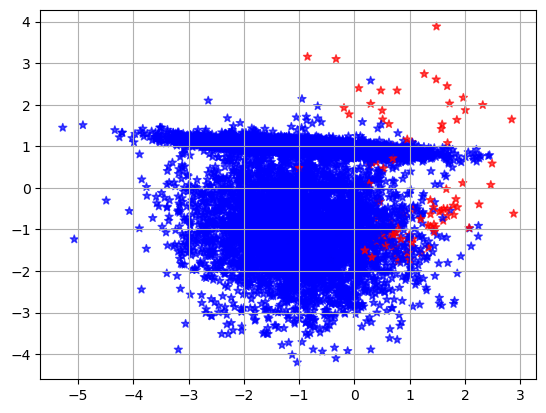

In [5]:

# x轴表示第一个特征 y轴表示第二个特征 颜色表示类别
plt.scatter(X[:,0],X[:,1],c = y, marker = "*",cmap = matplotlib.cm.get_cmap(name="bwr"),alpha = 0.7)
plt.grid(True)
plt.show()

In [6]:
# 数据预处理
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [7]:
# 建立神经网络模型

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(activation='relu', solver='sgd', alpha=1e-5, hidden_layer_sizes=(10,), random_state=1)
model.fit(X, y)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10,), random_state=1,
              solver='sgd')

In [21]:
# 使用keras 来定义神经网络
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# define the neural network model
def define_model(n_input):
	# define model
	model = Sequential()
	# define first hidden layer and visible layer
	model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	# define output layer
	model.add(Dense(1, activation='sigmoid'))
	# define loss and optimizer
	model.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])
	return model



ROC AUC: 0.934


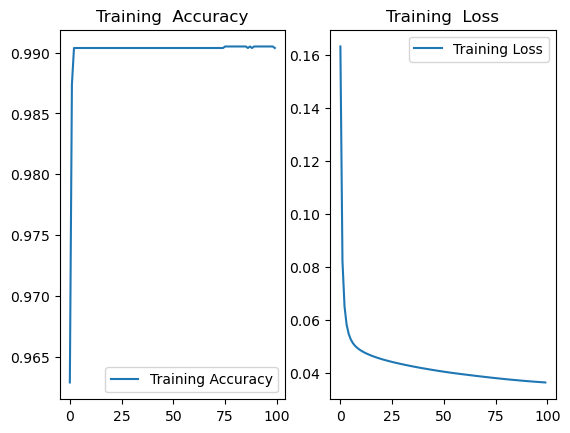

In [23]:
#训练神经网络 预测结果 输出评价指标
# define the model
from sklearn.metrics import roc_auc_score


n_input = x_train.shape[1]
model = define_model(n_input)
# fit model
history=model.fit(x_train, y_train, epochs=100, verbose=0)
# make predictions on the test dataset
y_predict = model.predict(x_test)
# evaluate the ROC AUC of the predictions
score = roc_auc_score(y_test, y_predict)
print('ROC AUC: %.3f' % score)

acc = history.history['accuracy']

loss = history.history['loss']


plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.title('Training  Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.title('Training  Loss')
plt.legend()
plt.show()


In [20]:
# 加权神经网络
weights = {0:99, 1:1}
history = model.fit(x_train, y_train, class_weight=weights, epochs=100, verbose=0)
y_predict=model.predict(x_test)
score=roc_auc_score(y_test,y_predict)
print('ROC AUC: %.3f'% score)

print(history.history.keys())

acc = history.history['sparse_categorical_accuracy']

loss = history.history['loss']


plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.title('Training  Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.title('Training  Loss')
plt.legend()
plt.show()

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

-------------load the model-----------------
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0244 - sparse_categorical_accuracy: 0.9925 - val_loss: 0.0823 - val_sparse_categorical_accuracy: 0.9760
Epoch 2/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0198 - sparse_categorical_accuracy: 0.9939 - val_loss: 0.0821 - val_sparse_categorical_accuracy: 0.9777
Epoch 3/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0166 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.0856 - val_sparse_categorical_accuracy: 0.9765
Epoch 4/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0144 - sparse_categorical_accuracy: 0.9958 - val_loss: 0.0930 - val_sparse_categorical_accuracy: 0.9755
Epoch 5/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0118 - sparse_categorical_accuracy: 0.9962 - val_loss: 0.0899 - val_sparse_cat

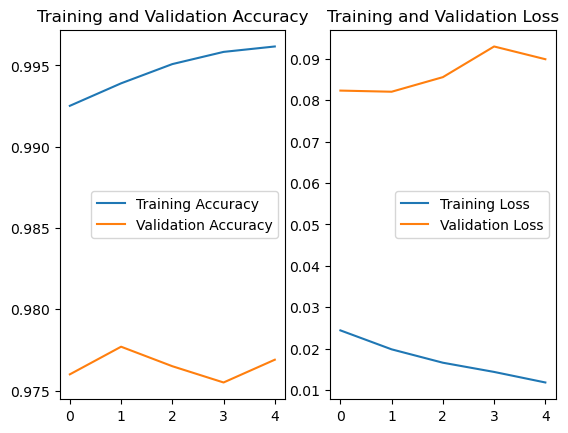

In [43]:

# 神经网络 手写数字识别
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

np.set_printoptions(threshold=np.inf)

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0   #数据归一化

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),   # 将输入特征拉直为一维数组
    tf.keras.layers.Dense(128, activation='relu'),  #全连接层 128个神经元 使用relu激活函数
    tf.keras.layers.Dense(10, activation='softmax')  # 输出层 分为10类 所以有10个输出神经元 使用softmax逻辑回归分类函数 
                                                     #将分类结果 转化为属于每一类的概率
])

model.compile(optimizer='adam',  #指明使用的 优化器 设置了学习率 和学习衰减率
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #损失函数
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/mnist.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################


print(history.history.keys())

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()




[2]


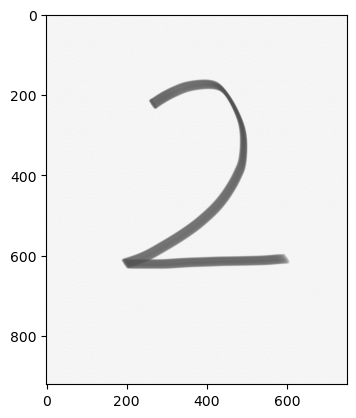



[5]


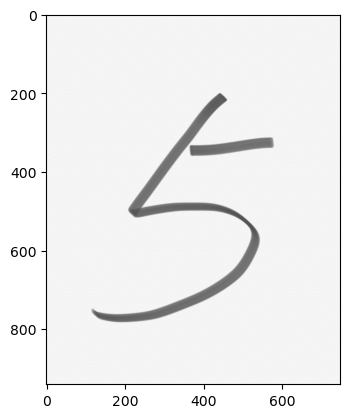



[0]


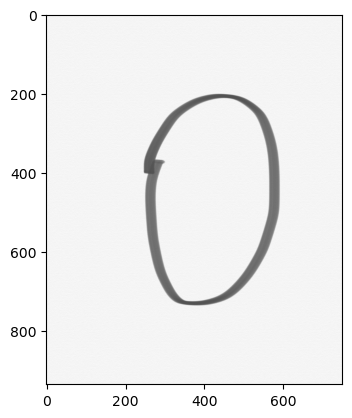

In [17]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

model_save_path = './checkpoint/mnist.ckpt'
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.load_weights(model_save_path)
preNum = int(input("input the number of test pictures:"))

for i in range(preNum):
    image_path = input("the path of test picture:")
    img = Image.open(image_path)

    image = plt.imread(image_path)
    plt.set_cmap('gray')
    plt.imshow(image)

    img = img.resize((28, 28), Image.ANTIALIAS)
    img_arr = np.array(img.convert('L'))

    for i in range(28):
        for j in range(28):
            if img_arr[i][j] < 200:
                img_arr[i][j] = 255
            else:
                img_arr[i][j] = 0

    img_arr = img_arr / 255.0
    x_predict = img_arr[tf.newaxis, ...]
    result = model.predict(x_predict)
    pred = tf.argmax(result, axis=1)

    print('\n')
    tf.print(pred)

    plt.pause(1)
    plt.close()
